# Simple Linear Regression Application

#### This Python code builds a linear regression model using sales data and makes predictions with this model. Firstly, the data is read with the pandas library and the months and sales columns are separated. The data is split into training and test sets (train_test_split) and scaled with StandardScaler. A LinearRegression model is created and trained with the training set. The predictions of the model are obtained by inverse scaling (inverse_transform). The data are sorted and plotted with matplotlib for visualisation. Training data and predictions are shown with blue and red coloured markers respectively. In the graph, months and sales are labelled on the axes and a title is added.

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk

data = pd.read_csv("C:\\Users\\Arif Furkan\\OneDrive\\Belgeler\\Python_kullanirken\\satislar.csv")
print(data)
months = data[["Aylar"]]
sales = data[["Satislar"]]
sales2 = data.iloc[:,:1].values

    Aylar  Satislar
0       8   19671.5
1      10   23102.5
2      11   18865.5
3      13   21762.5
4      14   19945.5
5      19   28321.0
6      19   30075.0
7      20   27222.5
8      20   32222.5
9      24   28594.5
10     25   31609.0
11     25   27897.0
12     25   28478.5
13     26   28540.5
14     29   30555.5
15     31   33969.0
16     32   33014.5
17     34   41544.0
18     37   40681.5
19     37   40697.0
20     42   45869.0
21     44   49136.5
22     49   50651.0
23     50   56906.0
24     54   54715.5
25     55   52791.0
26     59   58484.5
27     59   56317.5
28     64   61195.5
29     65   60936.0


## Split the Dataset into Training and Testing Sets

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(months, sales, test_size=0.33, random_state=0)

## Scaling the data

In [37]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()

x_train_scaled = sc_x.fit_transform(x_train)
x_test_scaled = sc_x.transform(x_test)

y_train_scaled = sc_y.fit_transform(y_train)
y_test_scaled = sc_y.transform(y_test)

"""
print(x_train)
print(x_test)
print(y_train)
print(y_test)
"""

'\nprint(x_train)\nprint(x_test)\nprint(y_train)\nprint(y_test)\n'

## Train the Linear Regression Model

In [38]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_scaled, y_train_scaled)

LinearRegression()

## Make Predictions

In [39]:
prediction_scaled = lr.predict(x_test_scaled)
print(prediction_scaled)

[[-1.195597  ]
 [ 2.19299343]
 [-0.23656197]
 [-0.30049764]
 [ 1.87331509]
 [ 1.55363675]
 [ 1.87331509]
 [-0.30049764]
 [ 0.27492338]
 [ 1.2339584 ]]


## Plot the Results

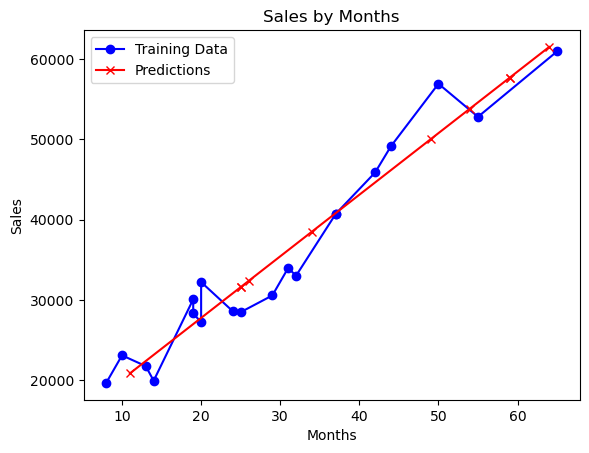

In [40]:
prediction = sc_y.inverse_transform(prediction_scaled)

x_train_sorted = x_train.sort_values(by="Aylar")
y_train_sorted = y_train.loc[x_train_sorted.index]

x_test_sorted = x_test.sort_values(by="Aylar")
prediction_sorted = prediction[np.argsort(x_test.values.ravel())]

# Sonuçları Çiz
plt.plot(x_train_sorted, y_train_sorted, label="Training Data", color="blue", marker='o')
plt.plot(x_test_sorted, prediction_sorted, label="Predictions", color="red", marker='x')
plt.title("Sales by Months")
plt.xlabel("Months")
plt.ylabel("Sales")
plt.legend()
plt.show()